In [2]:
import pandas as pd
import numpy as np
from six.moves import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}


plt.rc('font', **font)
matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",101)
pd.set_option("display.max_colwidth",5000)

/home/thakursc1/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
"""l = pd.read_csv('final.csv')
df = pd.read_csv('attributes.csv')"""

"l = pd.read_csv('final.csv')\ndf = pd.read_csv('attributes.csv')"

# Customer Demographic Analysis

So we will seperate out customer demographic data and understand his or her background and analyze the loans respectively 

In [4]:
"""l.columns.values"""

'l.columns.values'

In [5]:
# Seperating customer centric attributes
"""cus_att = ['id',
           'member_id',
           'loan_amnt',
           'funded_amnt',
           'emp_length',
           'home_ownership',
           'annual_inc',
           'loan_status',
           'purpose','title',
           'zip_code',
           'addr_state',
           'open_acc',
           'application_type']"""

"cus_att = ['id',\n           'member_id',\n           'loan_amnt',\n           'funded_amnt',\n           'emp_length',\n           'home_ownership',\n           'annual_inc',\n           'loan_status',\n           'purpose','title',\n           'zip_code',\n           'addr_state',\n           'open_acc',\n           'application_type']"

In [6]:
"""cust_df = l[cus_att]
cust_df.to_csv('cust.csv')"""

"cust_df = l[cus_att]\ncust_df.to_csv('cust.csv')"

# What kind of cutomers take more than one loans ?

In [7]:
cust_df = pd.read_csv('cust.csv')

In [8]:
print("number of customers ",cust_df.member_id.value_counts().shape)
print("number of loans",cust_df.id.value_counts().shape)
## looks like all customers have only one loan 
### Removing emp_length non available items
cust_df1 = cust_df[~(cust_df.emp_length=='n/a')]
cust_df1.shape

cust_dist  = cust_df1.groupby(['emp_length','loan_status'])['loan_status'].count().unstack('emp_length')
charged_off = cust_df1.groupby(['emp_length','loan_status'])['emp_length'].count().unstack('loan_status')['Charged Off']

number of customers  (869041,)
number of loans (869041,)


/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


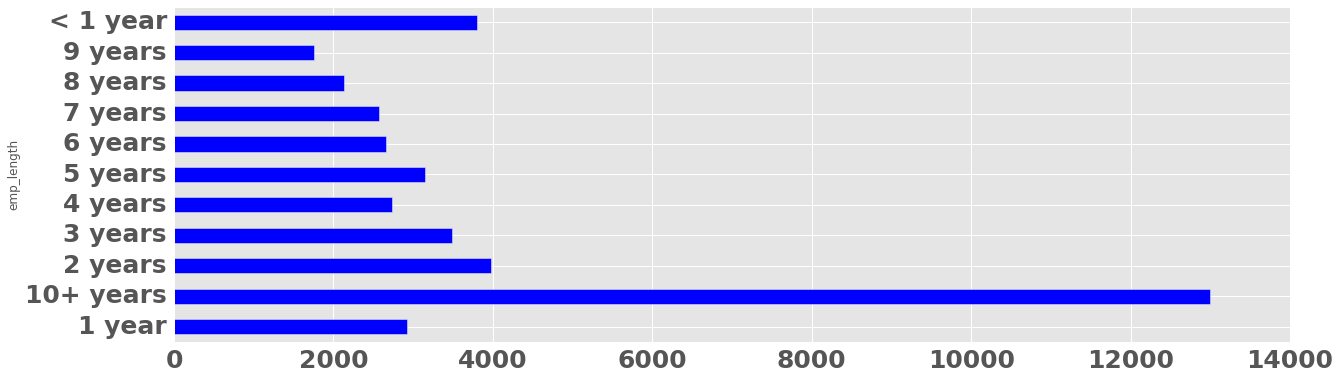

In [9]:
## Plotting above data
charged_off.plot(kind='barh',figsize=(20,6),fontsize=25)
## A person is very likely to default if he has 10+ years of experience
## There is a significant 


/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


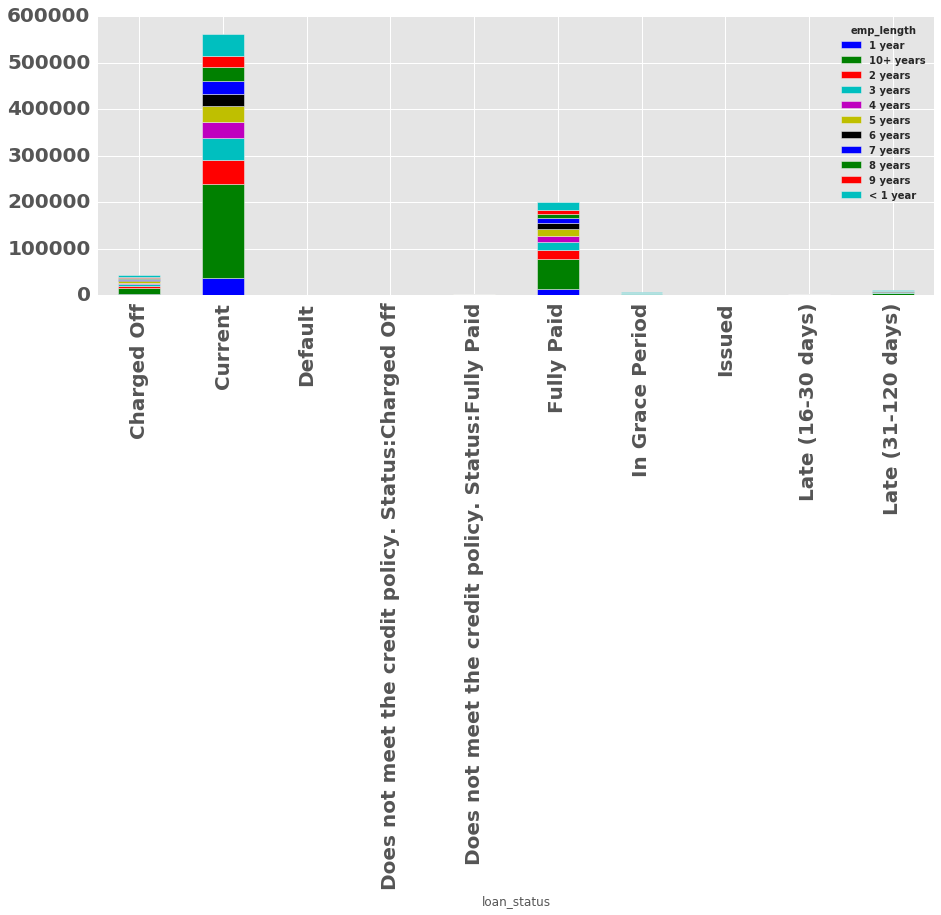

In [10]:
cust_dist.plot(kind='bar',stacked=True,figsize=(15,5),fontsize=20)

## As we can clearly if a person is either 1 year experienced or 10 years + experienced he is very likely to have issued a loan 


In [11]:
cust_dist  = cust_df1.groupby(['home_ownership','loan_status'])['loan_status'].count().unstack('home_ownership')
charged_off = cust_df1.groupby(['home_ownership','loan_status'])['home_ownership'].count().unstack('loan_status')['Charged Off']

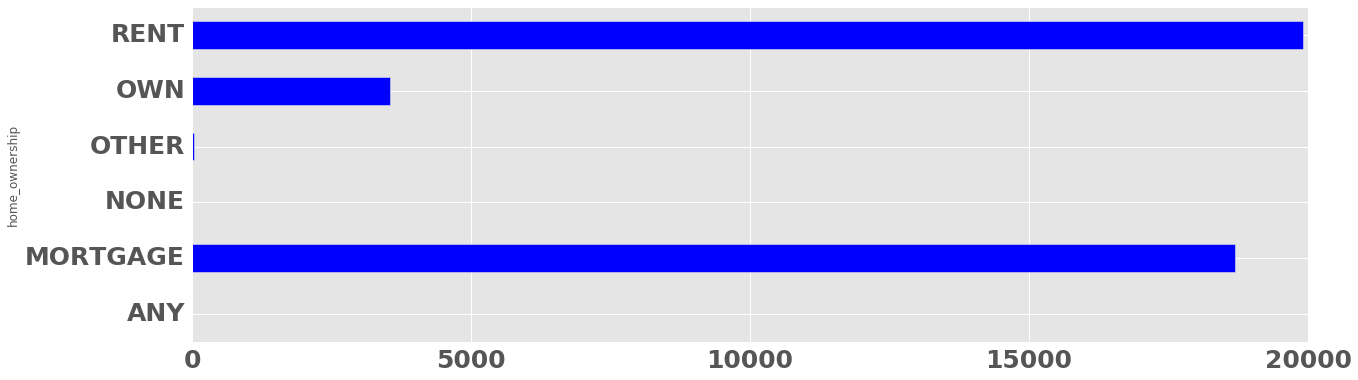

In [12]:
# defines no. of loans charged of per category of home_ownership 
charged_off.plot(kind='barh',figsize=(20,6),fontsize=25)
#Clearly if a house is on rent or morgage its more likely to charge off 

In [13]:
a = " ".join(list(cust_df['title']))

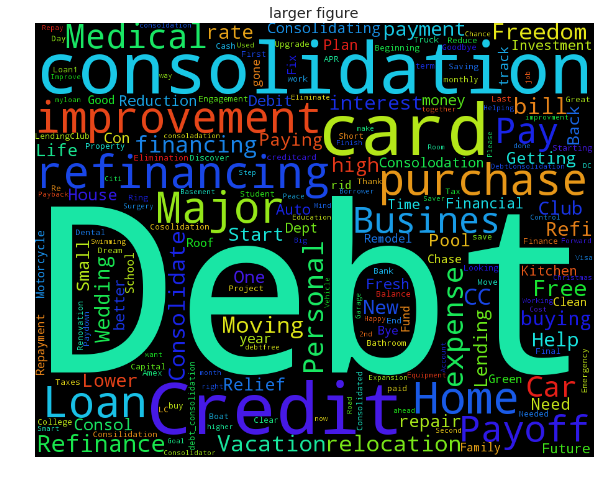

In [41]:

wc = WordCloud(background_color="black",
               stopwords=STOPWORDS,width=1800,
                      height=1400,scale=0.5)
# generate word cloud
wc = wc.generate(a)
# show
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(wc)
ax3.set_title('Loan Title Word CLoud')
plt.axis("off")
plt.show()

### I guess the word cloud says all of it

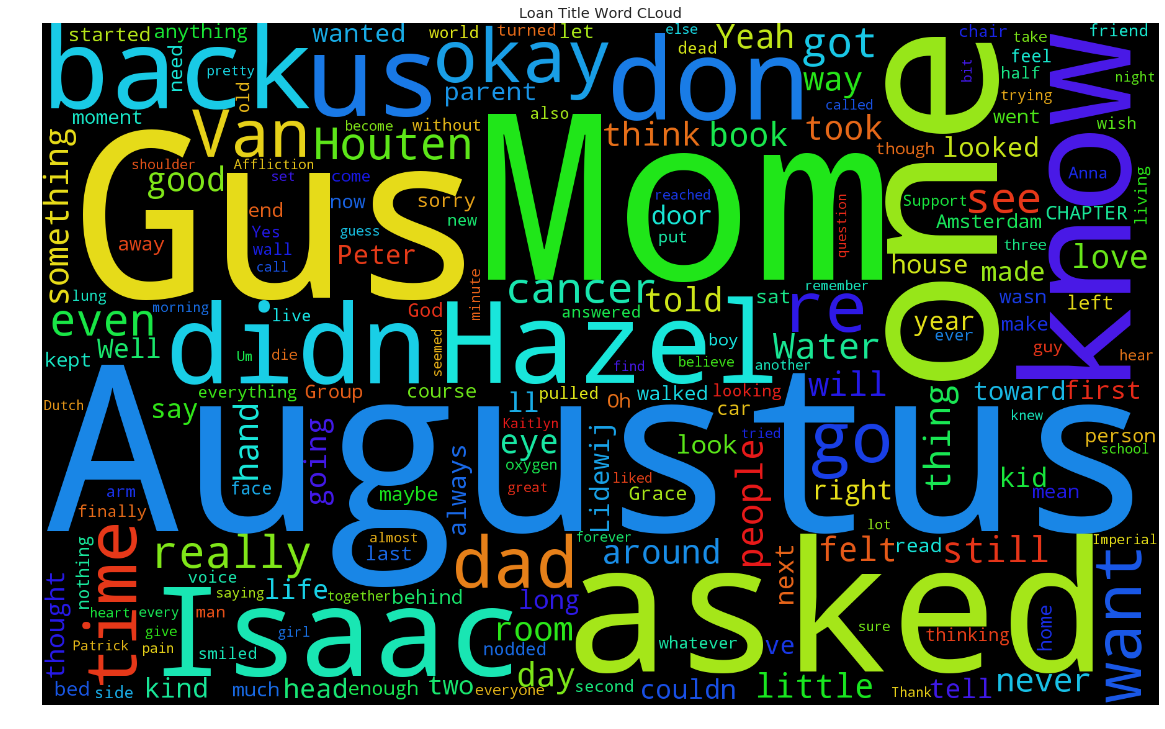

In [43]:

text = open('fst.txt').read()
wc = WordCloud(background_color="black",
               stopwords=STOPWORDS.add("said"),width=1800,
                      height=1100)
# generate word cloud
wc = wc.generate(text)
# show
fig2 = plt.figure(figsize = (20,20)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(wc)
ax3.set_title('Loan Title Word CLoud')
plt.axis("off")
plt.show()